Python language is ideal for 5-minute bars but when moving downtime sub-second time frames this might not be an ideal choice.
TA-Lib – TA-Lib or Technical Analysis library is an open-source library and is extensively used to perform technical analysis on financial data using technical indicators such as RSI (Relative Strength Index), Bollinger bands, MACD etc.
Zipline – Zipline is a Python library for trading applications that power the Quantopian service mentioned above. It is an event-driven system that supports both backtesting and live trading.
Financial data is available on various online websites. This data is also called as time-series data as it is indexed by time (the timescale can be monthly, weekly, daily, 5 minutely, minutely, etc.). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt
import yfinance as yf

In [15]:
data=pd.read_csv('NIFTY50_Data.csv',header=None)

In [16]:
data=data[::-1].values

In [17]:
data=pd.DataFrame(data)

In [18]:
data.columns=['Close']

In [19]:
data.head()

,Close
0,337.29
1,331.45
2,322.11
3,325.69
4,333.35


#install yfinance for downloading stock data using 
#pip install yfinance

In [20]:
data.tail()

,Close
7015,11284.30
7016,11189.20
7017,11085.40
7018,10980.00
7019,10997.35


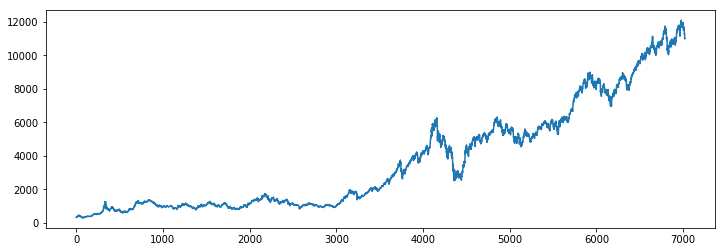

In [21]:
plt.figure(figsize=(12,4))
plt.plot(data.Close)

In [22]:
data['ma_10']=data.Close.rolling(10).mean()
data['ma_50']=data.Close.rolling(50).mean()
data['ma_200']=data.Close.rolling(200).mean()

In [23]:
data.head()

,Close,ma_10,ma_50,ma_200
0,337.29,NaN,NaN,NaN
1,331.45,NaN,NaN,NaN
2,322.11,NaN,NaN,NaN
3,325.69,NaN,NaN,NaN
4,333.35,NaN,NaN,NaN


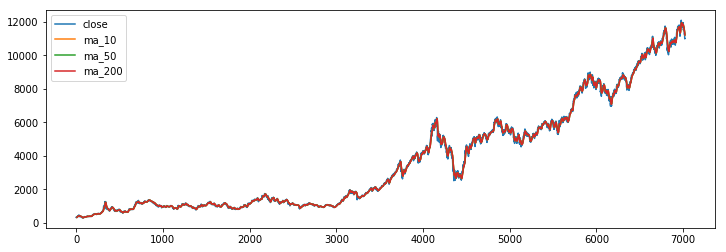

In [24]:
plt.figure(figsize=(12,4))
plt.plot(data.Close,label='close')
plt.plot(data.ma_10,label='ma_10')
plt.plot(data.ma_10,label='ma_50')
plt.plot(data.ma_10,label='ma_200')
plt.legend()

# MACD

In [25]:
#calculating exponential moving average
data['12d_ema']=data.Close.ewm(span=12).mean()
data['26d_ema']=data.Close.ewm(span=26).mean()

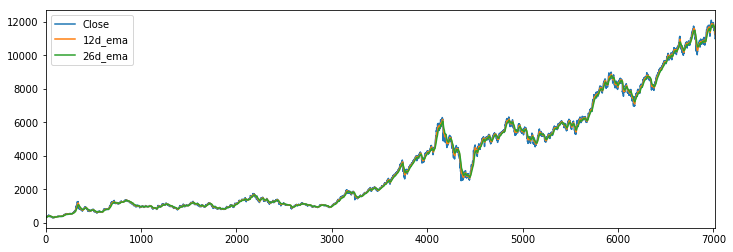

In [26]:
data[['Close','12d_ema','26d_ema']].plot(figsize=(12,4))

In [27]:
data['macd']=data['12d_ema']-data['26d_ema']

In [28]:
data['signal']=data.macd.ewm(span=9).mean()

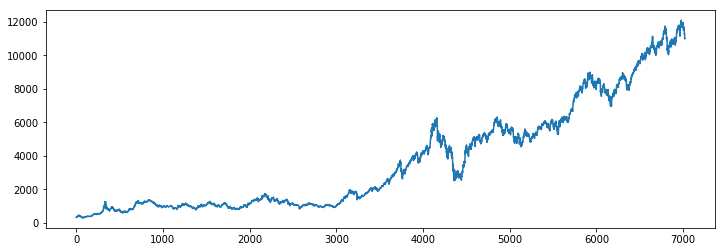

In [29]:
plt.figure(figsize=(12,4))
plt.plot(data['Close'])

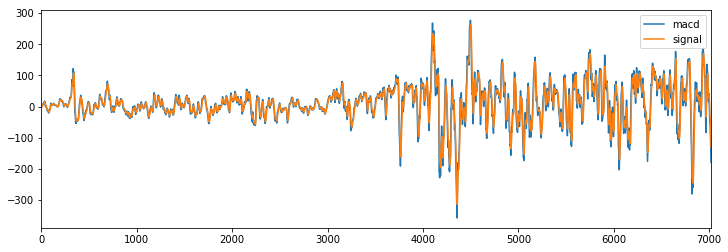

In [30]:
data[['macd','signal']].plot(figsize=(12,4))

There are three most commonly used types of moving averages, the simple, weighted and the exponential moving average.

# Create a trading signal 
When the value of MACD series is greater than signal series then buy, else sell.

In [31]:
data['trading_signal']=np.where((data['macd']>data['signal'] ),10,-10)

In [32]:
#plt.figure(figsize=(12,6))
#plt.plot(np.where(abs(data['macd']-data['signal'])>5,1,-1))

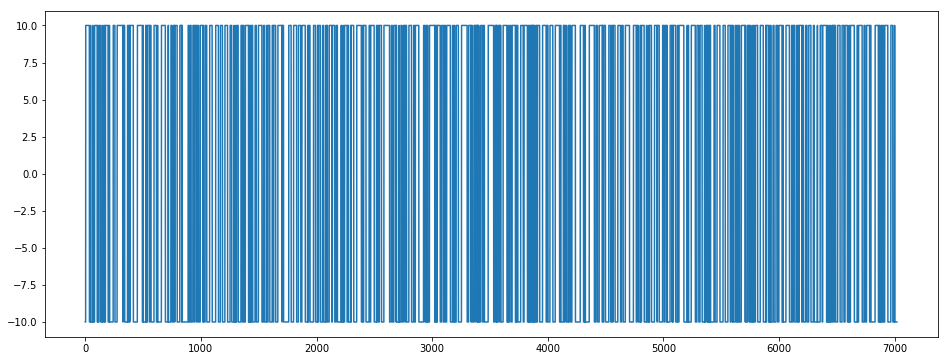

In [43]:
plt.figure(figsize=(16,6))
plt.plot(data['trading_signal'])

In [44]:
data['macd'].shape

(7020,)

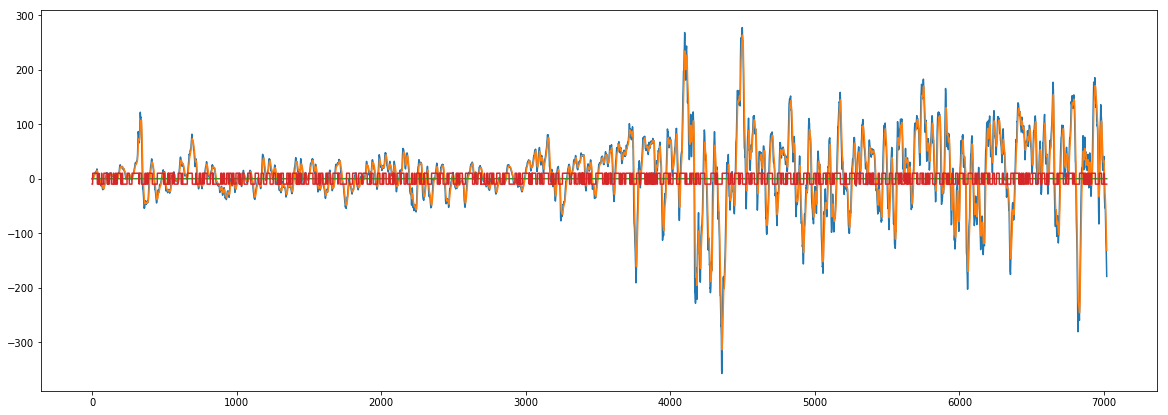

In [45]:
plt.figure(figsize=(20,7))
plt.plot(data['macd'])
plt.plot(data['signal'])
#data[['macd','signal']].plot(figsize=(12,4))
plt.plot(data.index,np.zeros((data['macd'].shape)))
plt.plot(data['trading_signal'])

# calculate the strategy return

In [46]:
#calculate returns
data['returns']=data.Close.pct_change()

In [47]:
data['returns'].head()

0         NaN
1   -0.017314
2   -0.028179
3    0.011114
4    0.023519
Name: returns, dtype: float64

In [48]:
#calculate stratergy returns
data['strategy_retuns']=data.returns*data.trading_signal.shift(1)

In [49]:
data.strategy_retuns.head()

0         NaN
1    0.173145
2    0.281792
3   -0.111142
4   -0.235193
Name: strategy_retuns, dtype: float64

In [50]:
#cumulative returns
cumulative_returns=(data.strategy_retuns+1).cumprod()-1

In [51]:
cumulative_returns.head()

0         NaN
1    0.173145
2    0.503728
3    0.336600
4    0.022241
Name: strategy_retuns, dtype: float64

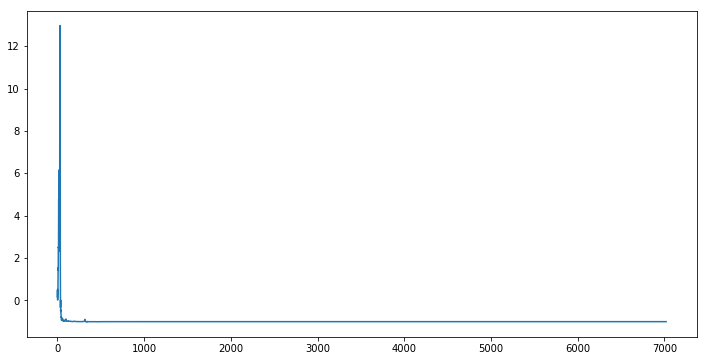

In [52]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns)